#### Нужно получить распределение у которого конечны первые четыре момента, а пятый — нет.

Рассмотрим функцию распределения $F_\xi(x) = (1 - \frac{1}{x^5})I(x \geq 1)$, с плотностью $p_\xi(x) = \frac{5}{x^6}I(x \geq 1)$.

Очевидно, что она неубывающая, ее предел при $x\to-\infty$ равен 0, а при $x\to+\infty$ равен 1 и она непрерывна справа, а значит это действительно функция распределения.

Рассмотрим ее первые пять моментов.

$E\xi = \int_1^\infty \frac{5x}{x^6}dx = \frac{5}{4}$

$E\xi^2 = \int_1^\infty \frac{5x^2}{x^6}dx = \frac{5}{3}$

$E\xi^3 = \int_1^\infty \frac{5x^3}{x^6}dx = \frac{5}{2}$

$E\xi^4 = \int_1^\infty \frac{5x^4}{x^6}dx = {5}$

$E\xi^5 = \int_1^\infty \frac{5x^5}{x^6}dx = \ln(\infty) - 0 = \infty$

Первые четыре момента этого распределения конечны, а пятый нет.

Сгенерируем выборку для $N = 10^4$, построим график плотности и нанесем точки выборки на график(с нулевой y -координатой).

In [1]:
# Импортируем нужные библиотеки
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import math
%matplotlib inline

Унаследуем наше распределение от scipy.stats.rv_continuous.

In [2]:
class mfive_distribution_gen(stats.rv_continuous):
    # Зададим плотность и функцию распределения.
    def _pdf(self, x):
        return 5 * (x ** -6)
    def _cdf(self,x):
        return 1 - (1 / (x ** 5))
# Параметр a это аналог индикатора, всюду до a плотность будет считаться равной нулю.
mfive_distribution = mfive_distribution_gen(a=1, name='mfive_distribution')


Далее идет функция, которая для всех $n \leq N$ считает оценку $s^2 = \bar{X^2} - (\bar{X})^2$ для дисперсии.

In [27]:
# Функция считает оценку s^2
def get_s2(sample, N):
    # Вначале посчитаем выборочное среднее и выборочный второй момент.
    cur_sum = 0
    cur_sum_2 = 0
    x_mean = np.zeros(N)
    x_moment_2 = np.zeros(N)
    for i in range(N):
        cur_sum += sample[i]
        cur_sum_2 += sample[i] ** 2
        x_mean[i] = (cur_sum / (i+1))
        x_moment_2[i] = (cur_sum_2 / (i + 1))
    # Теперь, для всех n <= N посчитаем оценку s^2 для дисперсии и вернем ее. 
    return x_moment_2 - x_mean ** 2

Далее идет описание функции которая генерирует выборку, строит график плотности, а также наносит точки выборки на график (с нулевой y-координатой). 

Строит график зависимости модуля разности оценки дисперсии и ее истинного значения от n.

In [46]:
# Функций принимает размер выборки.
def do_task(N=10**4):
    # Генерируем выборку.
    sample = mfive_distribution.rvs(size=N)
    # Сетка по оси абсцисс для построения графика.
    grid = np.linspace(0, 6, 1000)
    # Строим график.
    plt.figure(figsize=(11, 11))
    plt.xlabel("x")
    plt.ylabel(r"density")
    # Наносим точки выборки.
    plt.scatter(sample, np.zeros(N), color='g', alpha=0.11, label='sample') 
    # Строим график плотности.
    plt.plot(grid, mfive_distribution.pdf(grid), color='r', label='density')
    plt.title(r'density and distrubution(on the x-axis) graph', fontsize=10)
    plt.legend(fontsize=15, loc=1)
    plt.show()
    
    # Получим оценку s^2
    s2_estimation = get_s2(sample, N)
    # Построим график зависимости модуля разности оценки дисперсии и ее истинного значения от n.
    plt.figure(figsize=(11, 11))
    plt.xlabel("n")
    plt.ylabel(r"abs difference")
    # Посчитаем модуль разности оценки и ее истинного значения.
    # Аналитически посчитаем дисперсию нашей случайной величины, это получится разность второго момента и
    # первого момента в квадрате, а именно (16*5 - 25 * 3) / 48 = 5 / 48.(С методом var погрешность будет больше.)
    s2_abs_diff = abs(s2_estimation - 5./48)
    # Наносим точки на график.
    plt.plot(range(0, N), s2_abs_diff, color='g', label=r'$\bar{X^2} - (\bar{X})^2$ - dispersion')
    plt.title(r'abs difference between $s^2$ and real dispersion', fontsize=10)
    plt.legend(fontsize=15, loc=1)
    plt.show()

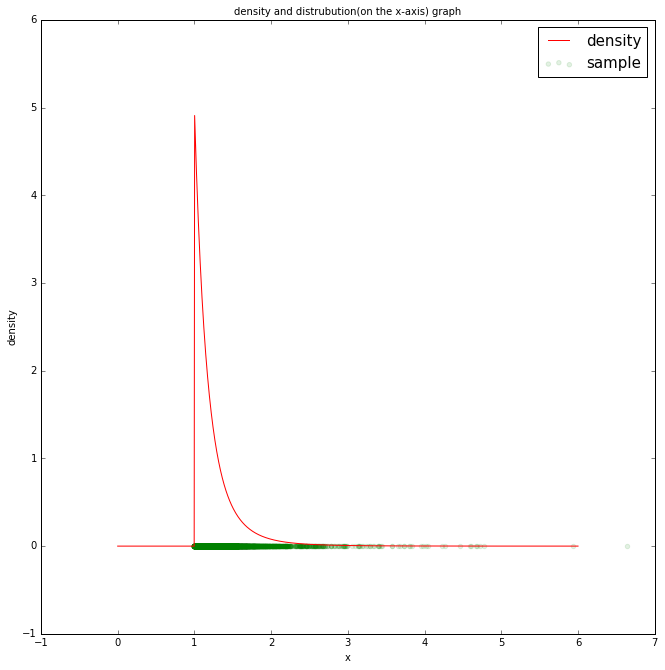

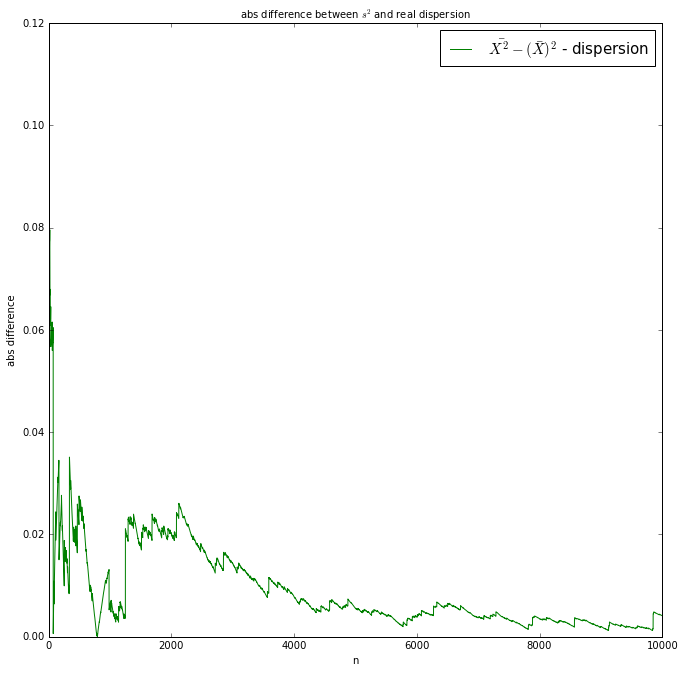

In [47]:
# Строим графики для моего распределения.
do_task()

Видно, что плотность выборки описывает плотность распределения, а оценка $s^2 = \bar{X^2} - (\bar{X})^2$ стремится к истинной дисперсии случайной величины.

Проведем аналогичное исследование для выборки из распределения Коши, где вместо графика модуля разности оценки дисперсии и ее истинного значения (которого не существует) построим график оценки дисперсии.

In [60]:
# Функция делающая все необходимое.
def do_task_cauchy(N=10**4):
    # Сетка для оси абсцисс на графике.
    grid = np.linspace(-15., 15., 1000)
    plt.figure(figsize=(11, 11))
    plt.xlabel("x")
    plt.ylabel(r"density")
    # Создаем выборку
    sample = stats.cauchy.rvs(size=N)
    # Строим график
    plt.scatter(sample, np.zeros(N), color='g', alpha=0.11, label='sample') 
    # Строим график плотности.
    plt.plot(grid, stats.cauchy.pdf(grid), color='r', label='density')
    # Установим масштаб(ограничение) графика по оси x.
    plt.xlim(-15,15)
    plt.title(r'density and distrubution(on the x-axis) graph', fontsize=10)
    plt.legend(fontsize=15, loc=1)
    plt.show()
    
    # Получим оценку s^2
    s2_estimation = get_s2(sample, N)
    # Построим график оценки s^2 дисперсии в зависимости от n.
    plt.figure(figsize=(11, 11))
    plt.xlabel("n")
    plt.ylabel(r"estimation value")
    # Наносим точки на график.
    plt.plot(range(0, N), s2_estimation, color='g', label=r"$\bar{X^2} - (\bar{X})^2$")
    plt.title(r'values of $s^2 = \bar{X^2} - (\bar{X})^2$ - sample variance', fontsize=10)
    plt.legend(fontsize=15, loc=1)
    plt.show()

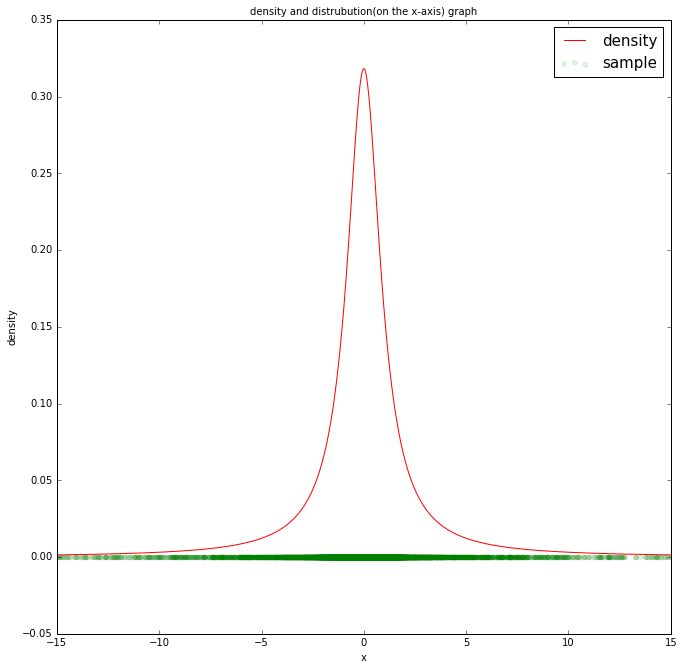

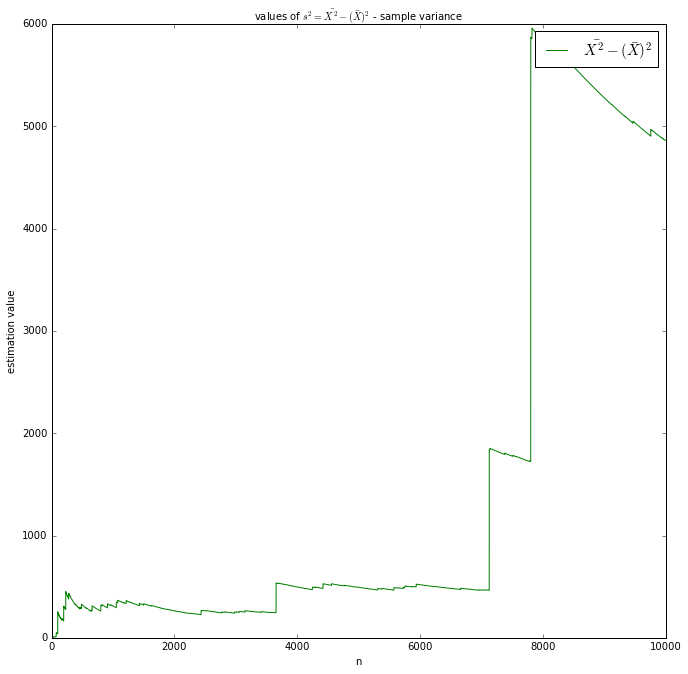

In [61]:
# Строим графики для распределения Коши.
do_task_cauchy()

#### Вывод.
По графикам моего распределения ($p_\xi(x) = \frac{5}{x^6}I(x \geq 1)$) видно, что плотность выборки описывает плотность распределения, а оценка $s^2 = \bar{X^2} - (\bar{X})^2$ стремится к истинной дисперсии случайной величины.

По графикам распределения Коши видно, что плотность выборки, тоже хорошо описывает плотность распределения, а график выборочной дисперсии ведет себя непредсказуемо, но растет, видимо стремясь к бесконечности.